In this exercise we have a binary class classification to identify whether one person has breast cancer or not.
We use "Breast Cancer Coimbra Data Set" to train our model and also we are going to try Logistic Regression, SVM with linear kernel, SVM with rbf kernel, Decision Tree and KNN algorithms to reach the best accuracy.

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataR2.csv to dataR2.csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['dataR2.csv']))
dataset.head(2)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1


In [ ]:
dataset.shape

(116, 10)

In [ ]:
dataset.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [ ]:
dataset['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [ ]:
count_no_sub = len(dataset[dataset['Classification']==1])
count_sub = len(dataset[dataset['Classification']==2])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of class not having cancer", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of class having cancer", pct_of_sub*100)

percentage of class not having cancer 44.827586206896555
percentage of class having cancer 55.172413793103445


Based on calculation above, we are given an almost balanced dataset.

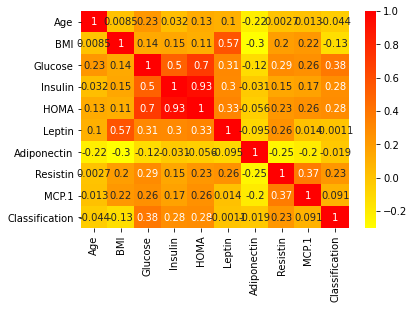

In [ ]:
heatmap_plot = sns.heatmap(dataset.corr(), cmap="autumn_r", annot= True)

Based on heatmap above we dont have highly correlated columns, Just we need to be aware of correlation of "Leptin" and "BMI" with the corr of 0.7.

In [ ]:
dataset.groupby(by='Classification').mean()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
1,58.076923,28.317336,88.230769,6.933769,1.552398,26.637933,10.328205,11.614813,499.730692
2,56.671875,26.984740,105.562500,12.513219,3.623342,26.596512,10.061167,17.253777,563.016500


In average, people who has breast cancer, have glucose more than 100 and insulin resistance score three times more than healthy people.

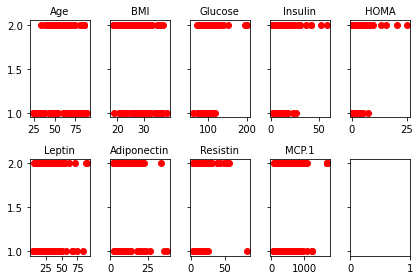

In [ ]:
columns = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']

fig, axs = plt.subplots(2, 5, sharey=True, tight_layout=True)

k = 0
for i in range(2):
  for j in range(5):
    axs[i,j].scatter(dataset[columns[k]],dataset['Classification'],color='red')
    axs[i,j].set_title(columns[k],fontsize=10)
    k = k+1
    if  k == 9:
      break

Based on diagrams above we can understand that "HOMA" factor and "Glucose" have almost the most impact for getting cancer but factors like "Age", "BMI", and "Leptin" do not have a straight impact. 
Also from "Age" diagram we can infer that being under 25 years old has less risk of getting cancer

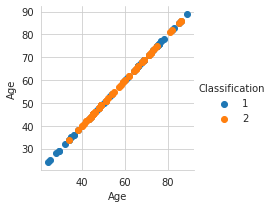

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue="Classification", height=3) \
   .map(plt.scatter, "Age", "Age") \
   .add_legend()
plt.show()

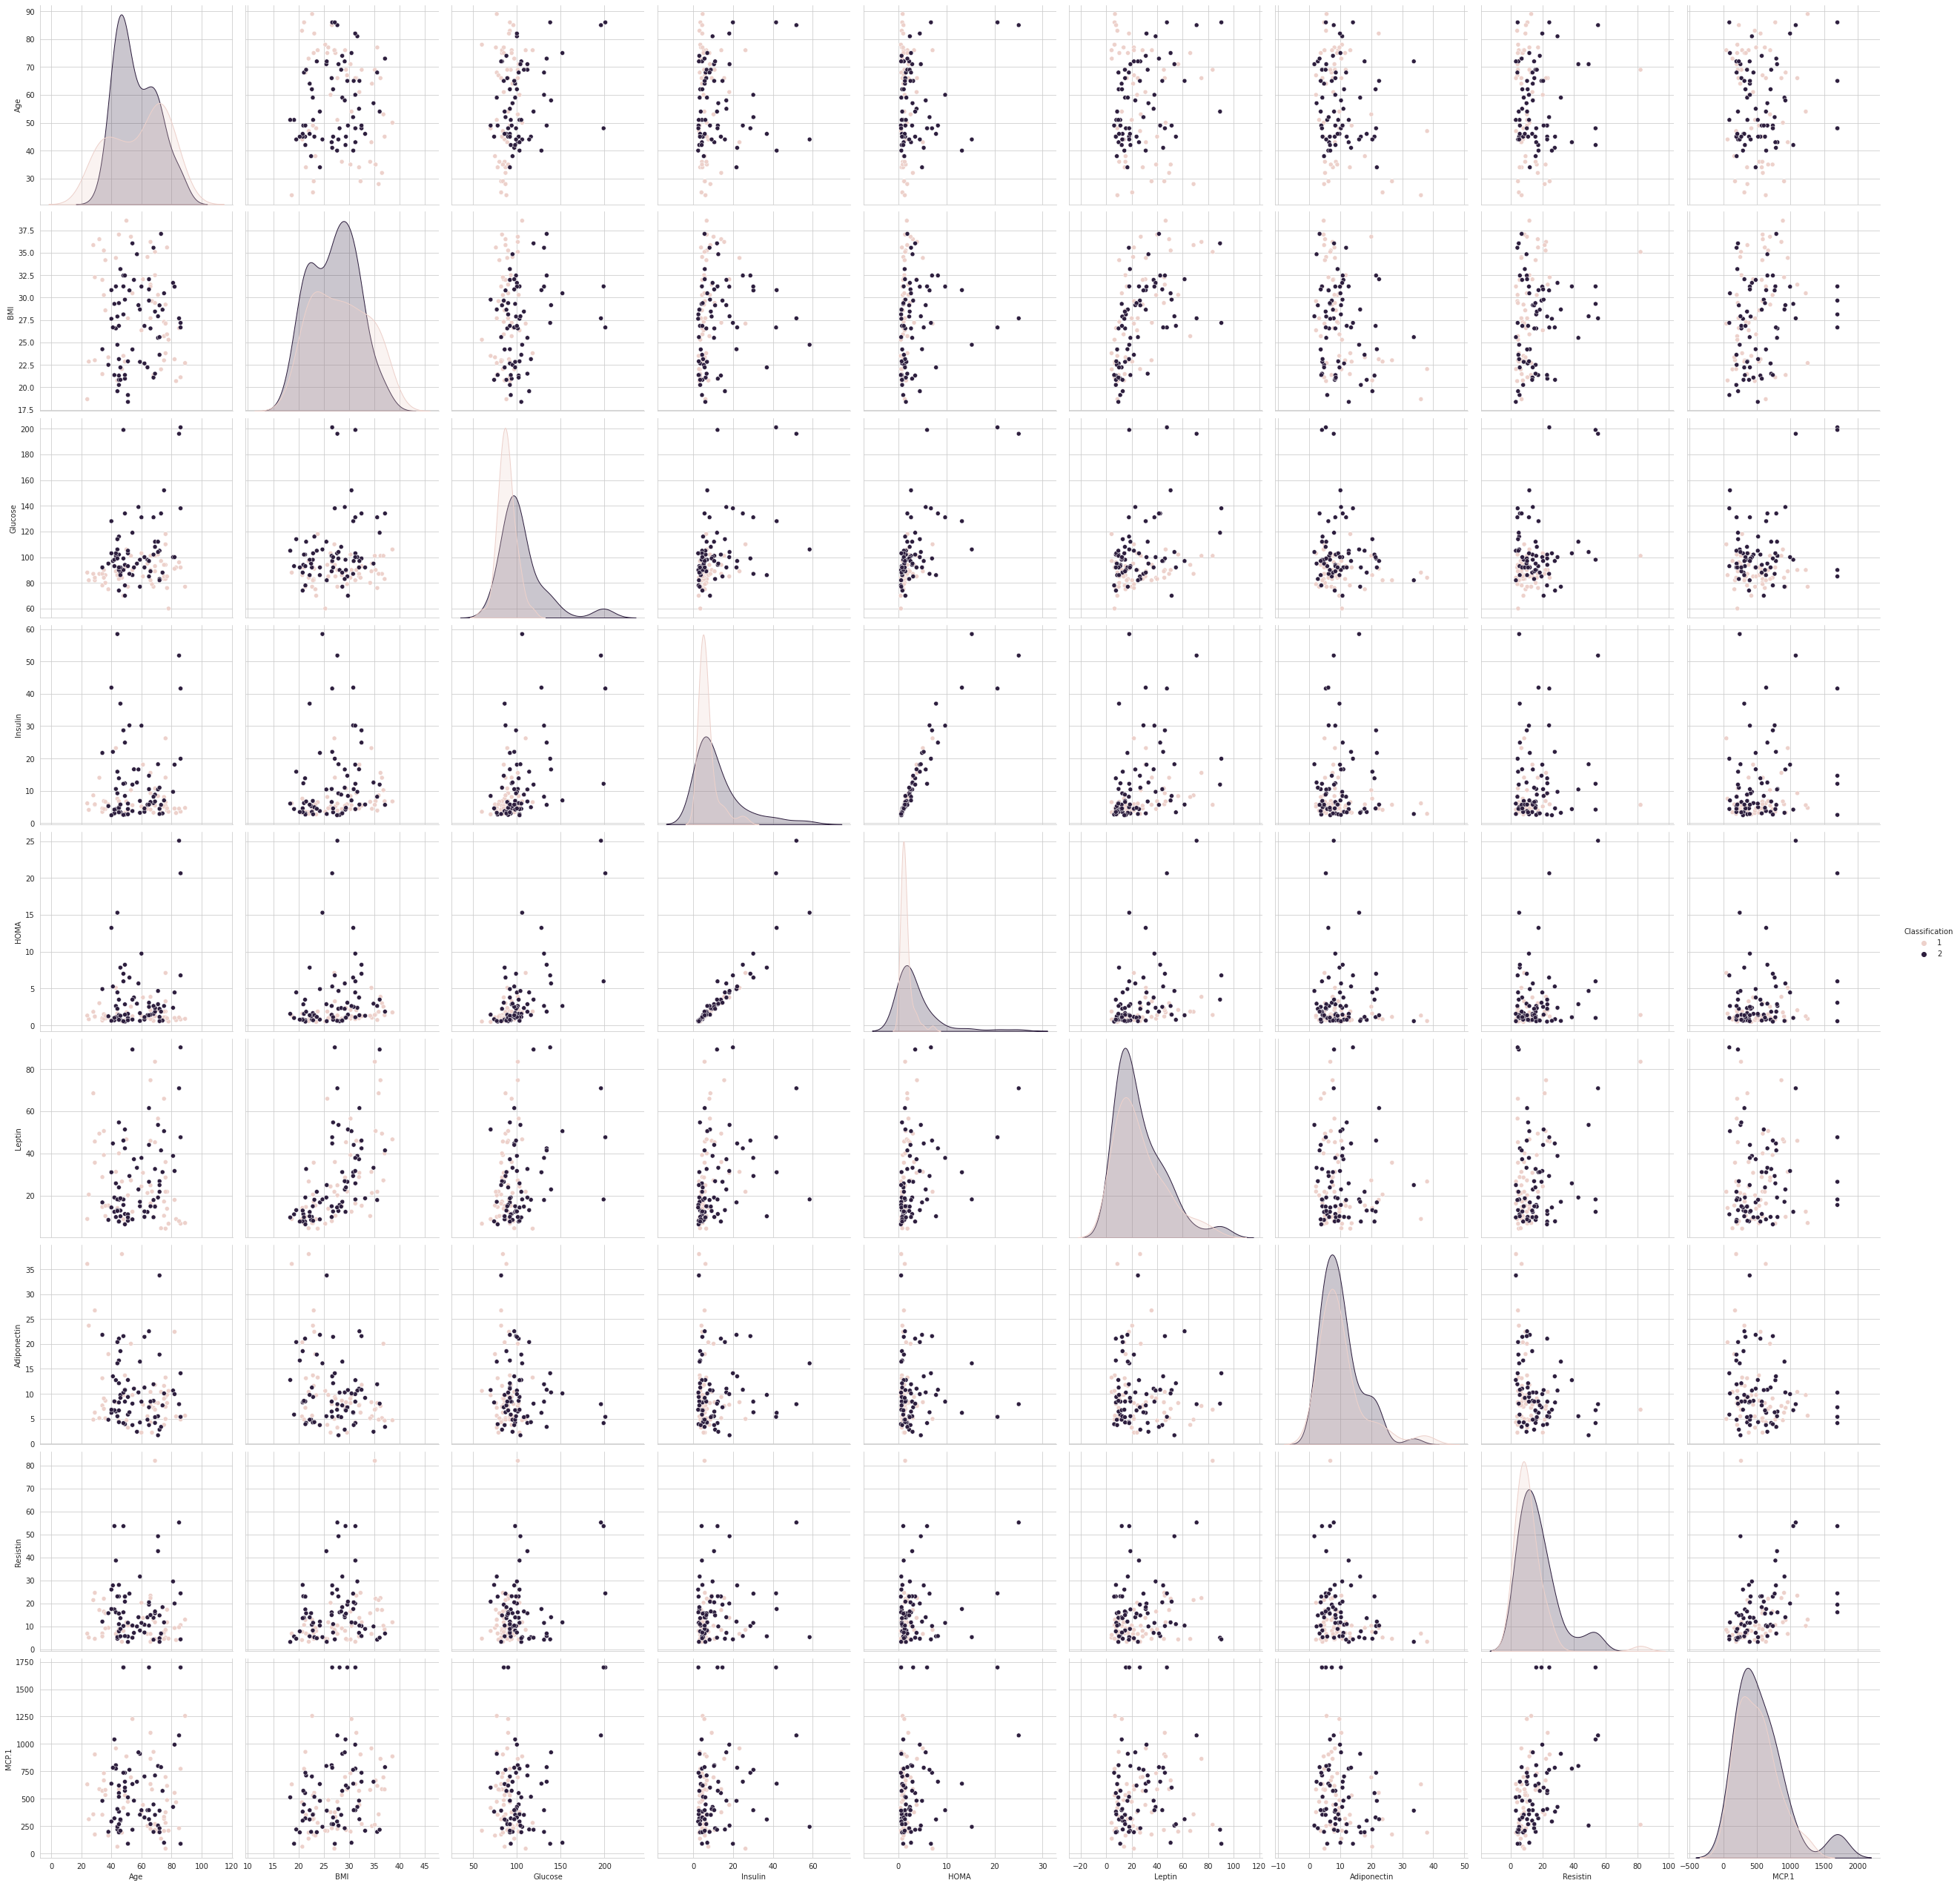

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="Classification", height=4);
plt.show()

From the matrix above we infer that two features "Age" and "Glucose" can have  the most impact on separating two classes of the data so we draw the plot of these two columns based on each other.

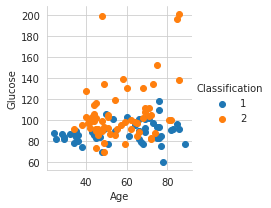

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue="Classification", height=3) \
   .map(plt.scatter, "Age", "Glucose") \
   .add_legend()
plt.show()

#  SVM classifier using Linear Kernel 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = dataset.drop('Classification', axis=1)
y = dataset['Classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 6  5]
 [ 3 10]]
              precision    recall  f1-score   support

           1       0.67      0.55      0.60        11
           2       0.67      0.77      0.71        13

    accuracy                           0.67        24
   macro avg       0.67      0.66      0.66        24
weighted avg       0.67      0.67      0.66        24



# SVM Model implementation using RBF kernel

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
X = dataset.drop('Classification', axis=1)
y = dataset['Classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
svclassifier = SVC(kernel='rbf', random_state=1, gamma=0.008, C=0.1)
svclassifier.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.008, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0 14]
 [ 0 10]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we see, choosing parameter gamma and regularization parameter (c) so small caused having the worst accuracy

In [ ]:
svclassifier = SVC(kernel='rbf', random_state=1, gamma='scale', C=2000)
svclassifier.fit(X_train, y_train)

SVC(C=2000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5 7]
 [4 8]]
              precision    recall  f1-score   support

           1       0.56      0.42      0.48        12
           2       0.53      0.67      0.59        12

    accuracy                           0.54        24
   macro avg       0.54      0.54      0.53        24
weighted avg       0.54      0.54      0.53        24



Trying different gamma and c parameters leaded us to use gamma = "scale" and c = 2000 in order to get the best metrics results.

# SVM Model implementation using RBF kernel with k-fold cross validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
X = dataset.drop('Classification', axis=1)
y = dataset['Classification']

In [ ]:
scores = []
best_svr = SVC(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3 0]
 [1 7]]
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.88      0.93         8

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
X = dataset.drop('Classification', axis=1)
y = dataset['Classification']

In [ ]:
#save the feature name and target variables
feature_names = X.columns
labels = y.unique()
labels = list(map(str, labels)) 
#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

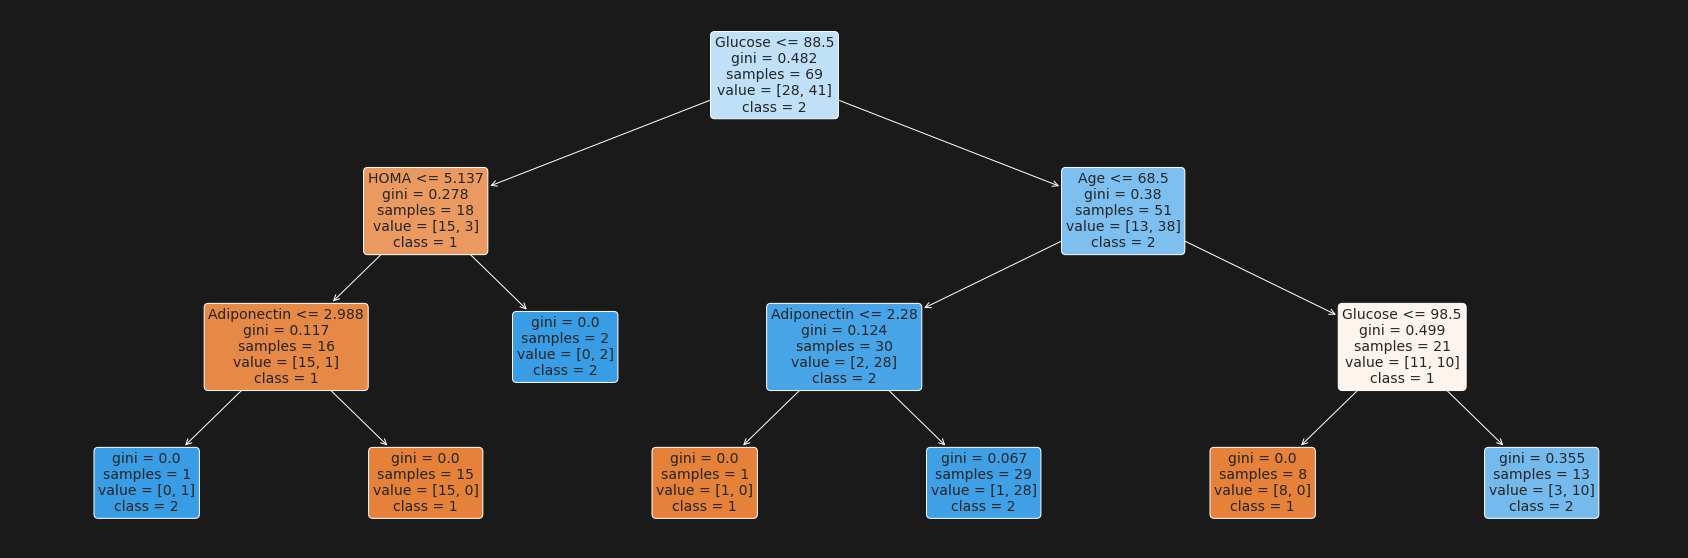

In [ ]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf, feature_names = feature_names, class_names = labels, rounded = True, filled = True, fontsize=14)
#show the plot
plt.show()

In [ ]:
test_pred_decision_tree = clf.predict(test_x)

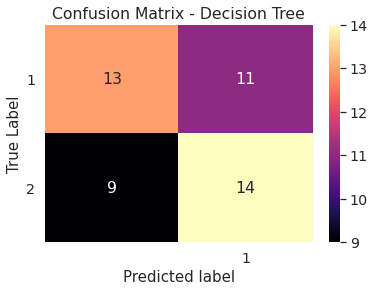

<Figure size 720x504 with 0 Axes>

In [ ]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

The confusion matrix above tells us that 9 samples of the data were for class "2" but the DTree classifier predicted it to be in class "1" and also 11 samples of the data were for class "1" but the DTree classifier predicted it to be in class "2".
Overally this algorithm wasn't that much awful because the rate of classifiering correctly was more than classifiering mistakenly but the result wasn't surprising. We can also use metrics to identify the numerical evaluations

Accurcy

The accuracy score is the fraction of true positives and true negatives over the total number of assigned labels

sum(diagonals in the confusion matrix) / sum (all boxes in the confusion matrix)

In [ ]:
metrics.accuracy_score(test_lab, test_pred_decision_tree)

0.574468085106383

Precision

This tells us how many of the values we predicted to be in a certain class are actually in that class. Essentially, this tells us how we performed in terms of false positives.

True positive (number in diagonal)/All positives (column sum)

In [ ]:
#get the precision score
precision = metrics.precision_score(test_lab, test_pred_decision_tree, average=None)
#turn it into a dataframe
precision_results = pd.DataFrame(precision, index=labels)
#rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results

,precision
1,0.590909
2,0.560000


Recall

This tells us how many of the values in each class were given the correct label, thus telling use how it performed relative to false negatives.

True positive (number in diagonal)/All assignments (row sum)

In [ ]:
recall = metrics.recall_score(test_lab, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
1,0.541667
2,0.608696


f1

This is a weighted average of precision and recall scale, with 1 being the best and 0 the worst. This uses the harmonic mean, so that the value is closer to the smaller number, and prevents overestimating the performance of the model in cases where one parameter is high and the other low. 

2 * (precision * recall)/(precision + recall)

In [ ]:
f1 = metrics.f1_score(test_lab, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1, index=labels)

f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
1,0.565217
2,0.583333


In [ ]:
print(metrics.classification_report(test_lab, test_pred_decision_tree))

              precision    recall  f1-score   support

           1       0.59      0.54      0.57        24
           2       0.56      0.61      0.58        23

    accuracy                           0.57        47
   macro avg       0.58      0.58      0.57        47
weighted avg       0.58      0.57      0.57        47



In [ ]:
#extract importance
importance = pd.DataFrame({'feature': X_train.columns, 'importance' : np.round(clf.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

       feature  importance
2      Glucose       0.552
0          Age       0.193
6  Adiponectin       0.138
4         HOMA       0.117
1          BMI       0.000
3      Insulin       0.000
5       Leptin       0.000
7     Resistin       0.000
8        MCP.1       0.000


Based on what we predicted from the diagrams in data understanding part of the exercise, "Glucose" and "Age" have the most impact on Breast Cancer.

We can try to improve the model by changing the features used, but we can also see how it responds to changes in hyperparameters by using GridSearchCV. This performs cross validation on the model by performing the algorithm on multiple runs of the sets of the training set, and tells us how the model responds.

For our purpose, we can change the max_depth and min_samples_split parameters which control how deep the tree goes, and the number of samples required to split an internal node.

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth': [1,2,3,4,5],  'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = f'{score}_macro')
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 4, 'min_samples_split': 2}

Grid scores on development set:
0.694 (+/-0.160) for {'max_depth': 1, 'min_samples_split': 2}
0.694 (+/-0.160) for {'max_depth': 1, 'min_samples_split': 4}
0.694 (+/-0.160) for {'max_depth': 1, 'min_samples_split': 6}
0.694 (+/-0.160) for {'max_depth': 1, 'min_samples_split': 8}
0.694 (+/-0.160) for {'max_depth': 1, 'min_samples_split': 10}
0.584 (+/-0.126) for {'max_depth': 2, 'min_samples_split': 2}
0.601 (+/-0.132) for {'max_depth': 2, 'min_samples_split': 4}
0.601 (+/-0.132) for {'max_depth': 2, 'min_samples_split': 6}
0.584 (+/-0.126) for {'max_depth': 2, 'min_samples_split': 8}
0.601 (+/-0.132) for {'max_depth': 2, 'min_samples_split': 10}
0.678 (+/-0.250) for {'max_depth': 3, 'min_samples_split': 2}
0.641 (+/-0.231) for {'max_depth': 3, 'min_samples_split': 4}
0.641 (+/-0.168) for {'max_depth': 3, 'min_samples_split': 6}
0.641 (+/-0.168) for {'max_depth': 

# Logistic Regression

In [ ]:
X = dataset.drop('Classification', axis=1)
y = dataset['Classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

To extract features which have best and impact on the result of the logistic regression model, we are going to use Recursive Feature Elimination (RFE) which is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. 

This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 50)
rfe = rfe.fit(X_train,y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


As we see all the features are important and we can not reduce any.

Logistic Regression Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


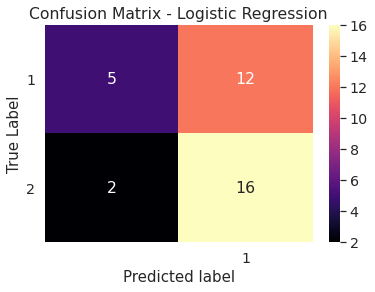

<Figure size 720x504 with 0 Axes>

In [ ]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Logistic Regression')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.29      0.42        17
           2       0.57      0.89      0.70        18

    accuracy                           0.60        35
   macro avg       0.64      0.59      0.56        35
weighted avg       0.64      0.60      0.56        35



ROC curve

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [ ]:
quotients = []
for number in y_test:
    quotients.append(int(number / 2))
y_test = quotients

[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]


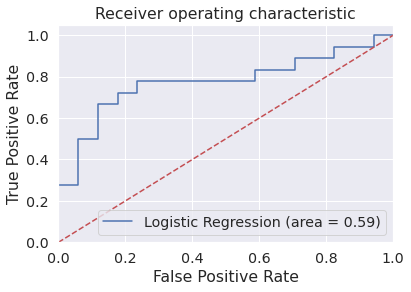

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# KNN Model implementation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
X = dataset.drop('Classification', axis=1)
y = dataset['Classification']

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,) 

In [ ]:
K = []
training = []
test = []
scores = {}

for k in range(2, 21):
	clf = KNeighborsClassifier(n_neighbors = k)
	clf.fit(X_train, y_train)

	training_score = clf.score(X_train, y_train)
	test_score = clf.score(X_test, y_test)
	K.append(k)

	training.append(training_score)
	test.append(test_score)
	scores[k] = [training_score, test_score]


In [ ]:
for keys, values in scores.items():
	print("k= ",keys, ':', "training score= ",values[0], "test score= ",values[1])

k=  2 : training score=  0.7701149425287356 test score=  0.6206896551724138
k=  3 : training score=  0.7931034482758621 test score=  0.6896551724137931
k=  4 : training score=  0.6436781609195402 test score=  0.5862068965517241
k=  5 : training score=  0.7011494252873564 test score=  0.4827586206896552
k=  6 : training score=  0.7126436781609196 test score=  0.4827586206896552
k=  7 : training score=  0.6781609195402298 test score=  0.4827586206896552
k=  8 : training score=  0.6206896551724138 test score=  0.41379310344827586
k=  9 : training score=  0.5977011494252874 test score=  0.41379310344827586
k=  10 : training score=  0.5747126436781609 test score=  0.3793103448275862
k=  11 : training score=  0.6091954022988506 test score=  0.4482758620689655
k=  12 : training score=  0.5977011494252874 test score=  0.41379310344827586
k=  13 : training score=  0.6206896551724138 test score=  0.5172413793103449
k=  14 : training score=  0.5977011494252874 test score=  0.41379310344827586
k= 

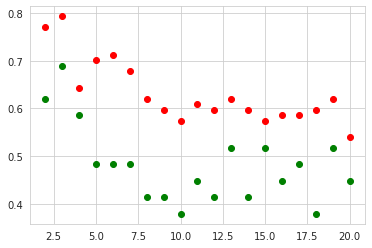

In [ ]:
plt.scatter(K, training, color ='r')
plt.scatter(K, test, color ='g')
plt.show()

From plot above we can infer that the optimum k would be about 4. Also above calculations would recommend this k because after k = 4 we can see that the scatter plot of the accuracy of the test data is going to decrease although having increase in accuracy of the training data.